(60000, 28, 28)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


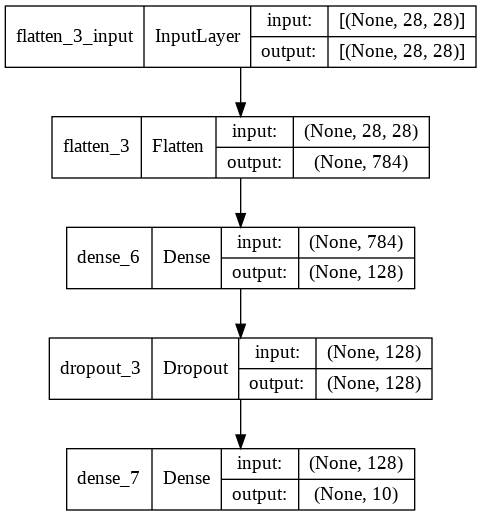

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0 # 0~1 사이의 값으로 만듬

model = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(units=128, activation='relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(10, activation='softmax')]
)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

"""
compile 시에
다수 클래스에 대한 정답 레이블을 바로 사용하여 손실함수를 계산할 때 loss='sparse_categorical_crossentropy'
One-hot encoding 형태로 정답 레이블이 정해진다면 loss='categorical_crossentropy'

모델을 그래프로 보여줌
"""
tf.keras.utils.plot_model(model,
                          to_file='model_plot.png',
                          show_shapes=True)

In [ ]:
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test, verbose=1)
# verbose 
# 0=silent, 1=progress bar, 2=one line per epoch

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0414 - accuracy: 0.9860 - val_loss: 0.0228 - val_accuracy: 0.9926
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0370 - accuracy: 0.9881 - val_loss: 0.0283 - val_accuracy: 0.9911
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0350 - accuracy: 0.9878 - val_loss: 0.0312 - val_accuracy: 0.9903
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0324 - accuracy: 0.9888 - val_loss: 0.0300 - val_accuracy: 0.9911
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9784


[0.08071725815534592, 0.9783999919891357]

In [1]:
print(x_test[0])

NameError: ignored

In [ ]:
"""
Keras 모델을 구축할 때는 
(a) 순차적으로 층을 쌓아가는 Sequential model
(b) 복잡한 구조의 모델을 만들 때 사용하는 Keras functional API

MNIST를 분석하기 위해

1 개의 Fully Connected Hidden layer
1 개의 Fully Connected output layer
를 쌓은 DNN(Deep Neural Network)

은닉층은 Relu를 활성화 함수로
출력층은 10개 classes에 대한 확률을 반환하기 때문에 sofrmax를 활성화 함수로 사용한다.
"""

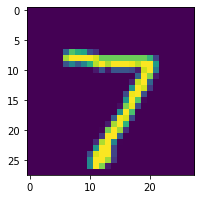

(10000, 10)
[3.2086890e-12 5.7109428e-14 6.7630929e-10 1.1274415e-04 3.6841892e-18
 4.4256074e-11 2.2995956e-18 9.9988723e-01 5.9833228e-12 4.3844489e-10]
preds[0] is:  7
preds[1] is:  2
[7 2 1 ... 4 5 6]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x_test[0])
plt.show()
preds = model.predict(x_test, batch_size=128)

print(preds.shape)
print(preds[0])
print("preds[0] is: ",np.argmax(preds[0]))
print("preds[1] is: ",np.argmax(preds[1]))
print(np.argmax(preds,axis=1))

In [ ]:
"""
model save를 통해서
딥러닝 모델이 현장 적용이 가능한 경우
모델의 요소와 학습된 가중치 정보를 파일 형태로 저장하고 로딩해서 재활용 가능
"""
model.save('mnist_dnn_model_flash.h5')

In [ ]:
import tensorflow as tf

dlwns_model = tf.keras.models.load_model('mnist_dnn_model_flash.h5')
dlwns_model.summary()

In [ ]:
import numpy as np
import random
import tensorflow as tf

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

(x_train, y_train), (x_test2, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test2.reshape(x_test2.shape[0], 28 * 28)

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

tf.model.add(tf.keras.layers.Dense(input_dim=784, units=256, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=256, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
600/600 [==============================] - 4s 6ms/step - loss: 2.0677 - accuracy: 0.8939
Epoch 2/15
600/600 [==============================] - 4s 6ms/step - loss: 0.3933 - accuracy: 0.9447
Epoch 3/15
600/600 [==============================] - 4s 6ms/step - loss: 0.2560 - accuracy: 0.9556
Epoch 4/15
600

In [ ]:
#  더 깊어진 모델에 drop out 층을 추가한 경우
random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10
drop_rate = 0.3
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers

tf.model.add(tf.keras.layers.Dense(input_dim=784, units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=512, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])